In [3]:
from langgraph.graph import StateGraph, END
from langchain_community.llms import Ollama

# Define a simple state schema
class State(dict):
    messages: list

# Create Ollama LLM
llm = Ollama(model="gemma2:2b")

# Define two nodes
def ask_topic(state: State):
    """Ask the user for a topic"""
    topic = input("Enter a topic to summarize: ")
    state["messages"] = [f"Summarize {topic} in one short paragraph."]
    return state

def summarize(state: State):
    """Generate summary using Ollama"""
    prompt = state["messages"][0]
    response = llm.invoke(prompt)
    print("\n AI Summary:\n", response)
    return state

# Build LangGraph
graph = StateGraph(State)
graph.add_node("ask_topic", ask_topic)
graph.add_node("summarize", summarize)

# Connect nodes
graph.add_edge("ask_topic", "summarize")
graph.add_edge("summarize", END)

# Set entry point
graph.set_entry_point("ask_topic")

# Compile and run
app = graph.compile()
app.invoke({})


Enter a topic to summarize:  what is model context protocol



 AI Summary:
 The Model Context Protocol (MCP) is a mechanism that ensures communication between large language models (LLMs) and their users, allowing for the efficient exchange of information like prompt history and context during interaction. It acts as a consistent interface, facilitating clear and organized data flow for improved accuracy, understanding, and ultimately, better AI interactions. 



{'messages': ['Summarize what is model context protocol in one short paragraph.']}

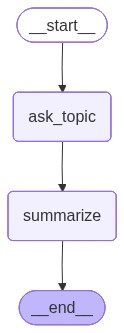

In [4]:
from IPython.display import Image, display
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass